# Projekt 2
## Analiza zbioru danych **"e-shop clothing 2008"**
## Kamień milowy 2: Model
Autorzy: Laura Hoang, Piotr Bielecki

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
with open("e-shop data and description/e-shop clothing 2008 data description.txt", "r") as f:
    print(f.read())
    f.close()

Data description “e-shop clothing 2008”

Variables:

1. YEAR (2008)


2. MONTH -> from April (4) to August (8)


3. DAY -> day number of the month


4. ORDER -> sequence of clicks during one session


5. COUNTRY -> variable indicating the country of origin of the IP address with the 
following categories:

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
29-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (*.biz)
44-com (*.com)
45-int (*.int)
46-net (*.net)
47-org (*.org)


6. SESSION ID -> variable indicating session id (short record)


7. PAGE 1 (MAIN CATEGORY) 

#### Import danych

In [3]:
data = pd.read_csv('e-shop data and description/e-shop clothing 2008.csv', sep=';')
data

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


Po poprzednim kamieniu milowym ustaliliśmy kilka kwestii:
- zdecydowaliśmy się na klasteryzację po **kategoriach produktów**
- utworzymy kolumnę z dniem tygodnia, gdyż taki format dat jaki mamy jest niewygodny do pracy i wnosi dla nas za mało informacji
- usuniemy kolumny `price` i `price 2`, gdyż ten zbiór danych mógłby być przeznaczony do tego, aby w przyszłości przewidywać ceny produktów

#### Data preprocessing

Tak jak ustaliliśmy powyżej, dodamy kolumnę `weekday` z dniem tygodnia wygenerowanym z dat.

In [4]:
import datetime

weekdays = []
for (yr, mth, day) in zip(data.year, data.month, data.day):
    weekdays += [datetime.datetime(yr, mth, day).weekday()]

data['weekday'] = weekdays
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

# 0- poniedzialek, 6- niedziela
data

,weekday,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,1,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,1,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,1,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,1,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


Kolumna `year` osiaga tylko jedna wartość (2008), przez co nie wnosi dla nas dużo informacji. Dlatego zostanie ona usunięta.

In [5]:
data = data.drop(columns=['year'])
data

,weekday,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,1,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,1,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,1,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,1,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,1,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2,8,13,2,34,24026,3,C2,12,1,1,43,1,1


Tak jak ustaliliśmy, usuniemy również kolumny `price` i `price 2`.

In [6]:
data = data.drop(columns=['price', 'price 2'])
data

,weekday,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,page
0,1,4,1,1,29,1,1,A13,1,5,1,1
1,1,4,1,2,29,1,1,A16,1,6,1,1
2,1,4,1,3,29,1,2,B4,10,2,1,1
3,1,4,1,4,29,1,2,B17,6,6,2,1
4,1,4,1,5,29,1,2,B8,4,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2,8,13,1,29,24024,2,B10,2,4,1,1
165470,2,8,13,1,9,24025,1,A11,3,4,1,1
165471,2,8,13,1,34,24026,1,A2,3,1,1,1
165472,2,8,13,2,34,24026,3,C2,12,1,1,1


zakodujemy dni tygodnia, miesiące i zmienną page 2 one hot encodingiem, usuniemy sessionID

In [204]:
encoded = pd.get_dummies(data['month'].astype(str))
data_preprocessed = data.drop('month', axis=1)
data_preprocessed = pd.concat([data_preprocessed, encoded], axis = 1)
data_preprocessed.rename(columns={'4':'april', '5':'may', '6':'june' , '7':'july', '8':'august'}, inplace=True)

encoded = pd.get_dummies(data['weekday'].astype(str))
data_preprocessed = data_preprocessed.drop('weekday', axis=1)
data_preprocessed = pd.concat([data_preprocessed, encoded], axis = 1)
data_preprocessed.rename(columns={'0':'Monday', '1':'Tuesday', '2':'Wednesday' , '3':'Thursday', '4':'Friday', '5':'Saturday', '6':'Sunday'}, inplace=True)
data_preprocessed

encoded = pd.get_dummies(data['page 2 (clothing model)'].astype(str))
data_preprocessed = data_preprocessed.drop('page 2 (clothing model)', axis=1)
data_preprocessed = pd.concat([data_preprocessed, encoded], axis = 1)
data_preprocessed = data_preprocessed.drop(columns = 'session ID')
data_preprocessed

histdata = data.groupby("page 2 (clothing model)").count().sort_values(by = 'weekday', ascending = False)['weekday']
page2_drop = pd.DataFrame(histdata.loc[histdata<1500]).index
page2_stay = pd.DataFrame(histdata.loc[histdata>=1500]).index
data_preprocessed = data_preprocessed.drop(columns = page2_drop)
data_preprocessed['other'] = 1 - np.sum(data_preprocessed[page2_stay], axis = 1)
data_preprocessed.head(10)

,day,order,country,page 1 (main category),colour,location,model photography,page,april,may,...,B11,B13,B24,B4,C17,C5,P1,P16,P6,other
0,1,1,29,1,1,5,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,29,1,1,6,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,3,29,2,10,2,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,4,29,2,6,6,2,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,5,29,2,4,3,2,1,1,0,...,0,0,0,0,0,0,0,0,0,1
5,1,6,29,3,6,1,2,4,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,7,29,3,5,1,2,4,1,0,...,0,0,0,0,0,0,0,0,0,1
7,1,8,29,4,9,5,1,4,1,0,...,0,0,0,0,0,0,0,0,0,1
8,1,9,29,4,6,4,2,5,1,0,...,0,0,0,0,0,0,0,0,0,1
9,1,1,29,2,9,5,1,2,1,0,...,0,0,0,0,0,0,0,0,0,1


# funkcja zwracająca metryki

`Silhouette score` - im większy tym lepiej  
`Calinski - Hrabasz` - określa proporcję między rozrzutem wewnątrzklastrowym i rozrzutem międzyklastrowym - im więcej tym lepiej  
`Davies - Bouldin` - im bliżej 0 tym lepiej


In [205]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [206]:
def plot_scores(model, X, max_clusters=20):
    
    cluster_num_seq = range(2, max_clusters+1)
    
    scores = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
    
    scores_values = count_clustering_scores(X, cluster_num_seq, model, scores)
    

    plt.plot(cluster_num_seq, scores_values[silhouette_score], 'bx-')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Miara metryki silhouette')
    plt.title('Wartość miary silhouette')
    plt.show()
        
    plt.plot(cluster_num_seq, scores_values[calinski_harabasz_score], 'bx-')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Miara metryki Calinski-Harabasz')
    plt.title('Wartość miary Calinski-Harabasz')
    plt.show()
    
    plt.plot(cluster_num_seq, scores_values[davies_bouldin_score], 'bx-')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Miara metryki Davies-Bouldin')
    plt.title('Wartość miary Davies-Bouldin')
    plt.show()

In [207]:
def count_clustering_scores(X, cluster_num, model, scores_fun_list):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = {}    
    for x in scores_fun_list:
        scores[x] = []
        
    for k in cluster_num_iter:
        model.set_params(n_clusters = k)
        labels = model.fit_predict(X)
        for a in scores_fun_list:
            temp = scores[a]
            temp.append(a(X, labels))
            scores[a] = temp
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

In [208]:
sample = data_preprocessed.sample(30000)

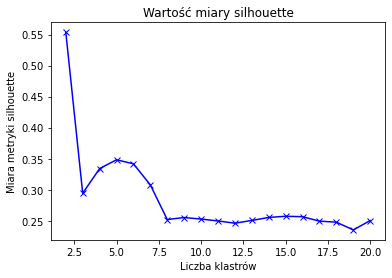

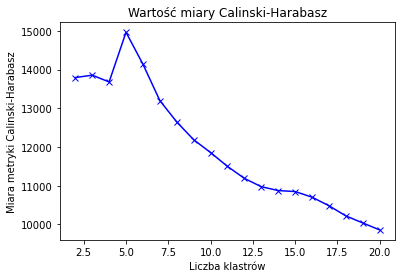

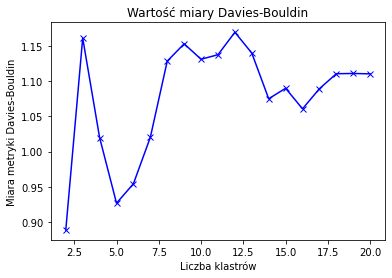

In [209]:
from sklearn.cluster import KMeans
plot_scores(KMeans(random_state=420, n_init = 20), sample)

In [210]:
from sklearn.cluster import MiniBatchKMeans

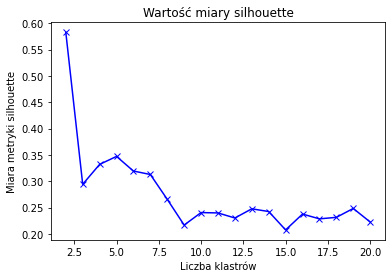

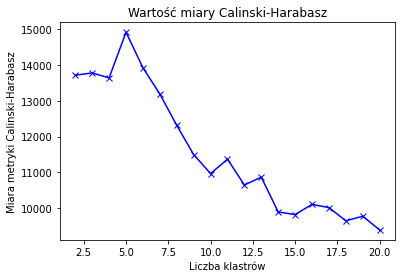

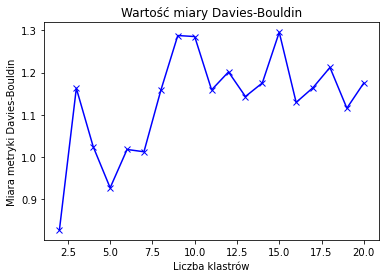

In [211]:
plot_scores(MiniBatchKMeans(random_state=420, n_init = 20, batch_size = 3072), sample)

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
plot_scores(AgglomerativeClustering(linkage = 'ward'), sample)

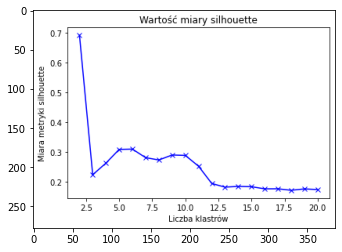

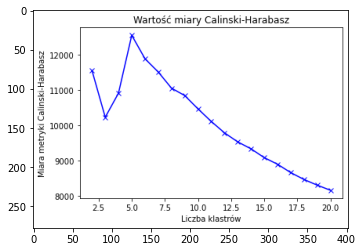

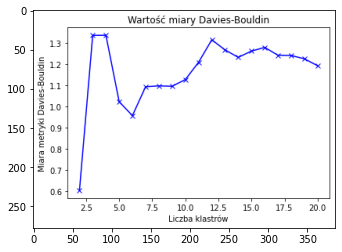

In [20]:
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Ward/silhouette.png')
imgplot = plt.imshow(img)
plt.show()
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Ward/CH.png')
imgplot = plt.imshow(img)
plt.show()
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Ward/DB.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
plot_scores(AgglomerativeClustering(linkage = 'average'), sample)

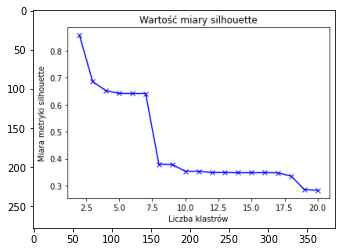

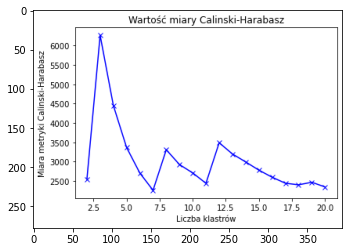

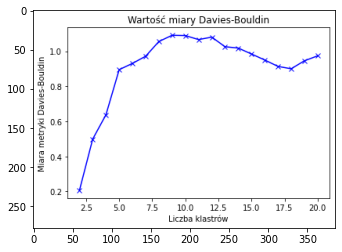

In [21]:
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Average/silhouette.png')
imgplot = plt.imshow(img)
plt.show()
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Average/CH.png')
imgplot = plt.imshow(img)
plt.show()
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Average/DB.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
plot_scores(AgglomerativeClustering(linkage = 'complete'), sample)

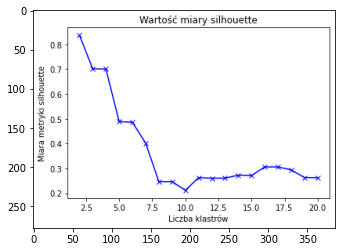

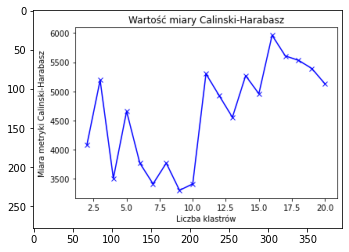

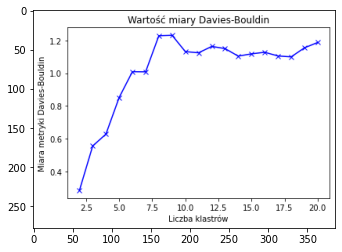

In [22]:
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Complete/silhouette.png')
imgplot = plt.imshow(img)
plt.show()
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Complete/CH.png')
imgplot = plt.imshow(img)
plt.show()
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Complete/DB.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
plot_scores(AgglomerativeClustering(linkage = 'single'), sample)

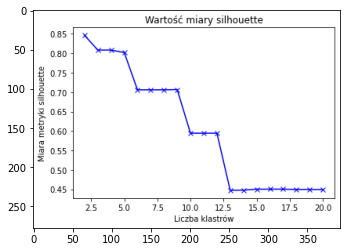

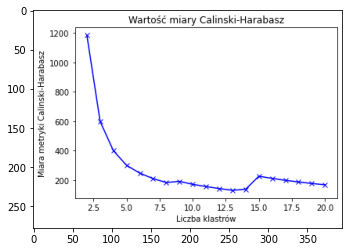

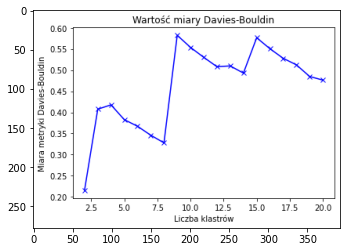

In [23]:
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Single/silhouette.png')
imgplot = plt.imshow(img)
plt.show()
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Single/CH.png')
imgplot = plt.imshow(img)
plt.show()
import matplotlib.image as mpimg
img = mpimg.imread('plots/Agglomerative/Single/DB.png')
imgplot = plt.imshow(img)
plt.show()

In [212]:
def draw_pca(data, labels):
    pca = PCA()
    data_pca = pca.fit_transform(X)
    data_pca = MinMaxScaler().fit_transform(data_pca)
    plt.figure(figsize = (16,12))
    sns.scatterplot(data_pca[:,0], data_pca[:,1], hue = labels, palette='tab20', size = 0.001)

C:\Users\mipec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

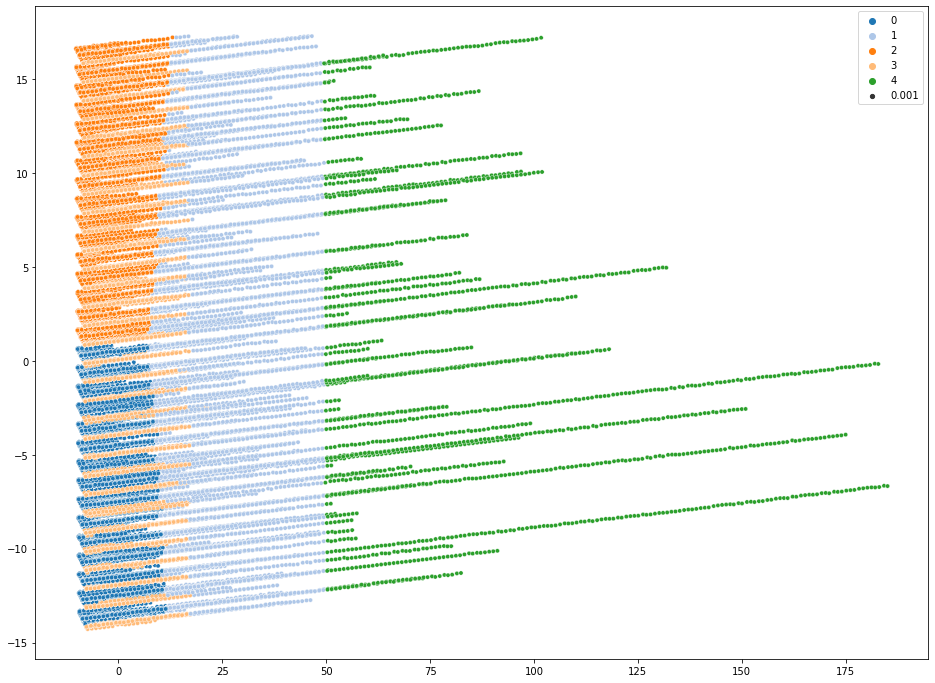

In [32]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = data_preprocessed
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(X)

pca = PCA()
data_pca = pca.fit_transform(X)
plt.figure(figsize = (16,12))
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue = labels, palette='tab20', size = 0.001)

In [43]:
KM_clusters = []
KM_clusters.append(data_preprocessed.iloc[np.where(labels == 0)])
KM_clusters.append(data_preprocessed.iloc[np.where(labels == 1)])
KM_clusters.append(data_preprocessed.iloc[np.where(labels == 2)])
KM_clusters.append(data_preprocessed.iloc[np.where(labels == 3)])
KM_clusters.append(data_preprocessed.iloc[np.where(labels == 4)])

In [45]:
KM_clusters[0].describe()

,day,order,country,page 1 (main category),colour,location,model photography,page,april,may,...,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
count,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,...,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000
mean,7.507974,5.900212,29.391493,2.410223,6.191071,3.257601,1.255866,1.653511,0.297241,0.174951,...,0.000932,0.000789,0.002309,0.002237,0.000014,0.004546,0.001104,0.001104,0.004102,0.004073
std,4.257107,4.690684,3.145300,1.143597,4.211483,1.712432,0.436350,0.949835,0.457047,0.379928,...,0.030518,0.028074,0.047997,0.047247,0.003787,0.067273,0.033213,0.033213,0.063913,0.063690
min,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,29.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.000000,29.000000,2.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,9.000000,29.000000,3.000000,9.000000,5.000000,2.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,21.000000,47.000000,4.000000,14.000000,6.000000,2.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
KM_clusters[1].describe()

,day,order,country,page 1 (main category),colour,location,model photography,page,april,may,...,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
count,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000,...,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000,17732.000000
mean,14.244473,30.682269,27.063557,2.818125,6.532371,3.294609,1.324329,2.121137,0.309892,0.214527,...,0.002199,0.002538,0.005583,0.005583,0.000056,0.004624,0.002989,0.002312,0.009756,0.005132
std,8.402430,9.645887,6.375117,1.158142,4.300539,1.723825,0.468137,1.145247,0.462462,0.410506,...,0.046848,0.050314,0.074514,0.074514,0.007510,0.067847,0.054591,0.048031,0.098294,0.071456
min,1.000000,17.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,23.000000,29.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,28.000000,29.000000,3.000000,6.000000,3.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,36.000000,29.000000,4.000000,9.000000,5.000000,2.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,59.000000,46.000000,4.000000,14.000000,6.000000,2.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
KM_clusters[2].describe()

,day,order,country,page 1 (main category),colour,location,model photography,page,april,may,...,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
count,58338.000000,58338.000000,58338.000000,58338.000000,58338.000000,58338.000000,58338.000000,58338.000000,58338.000000,58338.000000,...,58338.000000,58338.000000,58338.000000,58338.000000,58338.0,58338.000000,58338.000000,58338.000000,58338.000000,58338.000000
mean,23.151994,6.002914,29.400888,2.402876,6.214080,3.253814,1.256797,1.675889,0.272378,0.247900,...,0.000943,0.000891,0.002777,0.002108,0.0,0.004268,0.001337,0.001234,0.004268,0.003617
std,4.483860,4.815992,3.205840,1.145112,4.223461,1.709256,0.436870,0.965966,0.445187,0.431797,...,0.030691,0.029843,0.052624,0.045869,0.0,0.065193,0.036541,0.035110,0.065193,0.060032
min,16.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,2.000000,29.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,5.000000,29.000000,2.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.000000,9.000000,29.000000,3.000000,9.000000,5.000000,2.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,24.000000,46.000000,4.000000,14.000000,6.000000,2.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
KM_clusters[3].describe()

,day,order,country,page 1 (main category),colour,location,model photography,page,april,may,...,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
count,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,...,17500.000000,17500.000000,17500.000000,17500.000000,17500.0,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000
mean,14.183257,7.294629,9.221029,1.872686,6.009143,3.234743,1.211657,1.554686,0.324514,0.271314,...,0.000114,0.000171,0.000457,0.000286,0.0,0.000229,0.000114,0.000171,0.000229,0.000457
std,8.642394,6.085383,1.638741,0.902351,4.257770,1.718116,0.408495,0.806945,0.468206,0.444651,...,0.010690,0.013092,0.021377,0.016901,0.0,0.015117,0.010690,0.013092,0.015117,0.021377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,9.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,5.000000,9.000000,2.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,11.000000,9.000000,3.000000,9.000000,5.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,30.000000,21.000000,4.000000,14.000000,6.000000,2.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
KM_clusters[4].describe()

,day,order,country,page 1 (main category),colour,location,model photography,page,april,may,...,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
count,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.00000,2176.000000,...,2176.000000,2176.000000,2176.000000,2176.000000,2176.0,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000
mean,13.092371,87.874540,24.862132,2.892923,7.038143,3.286765,1.348346,2.346048,0.18796,0.202665,...,0.003676,0.007353,0.006893,0.008272,0.0,0.004136,0.005515,0.004136,0.005974,0.008272
std,7.564297,29.308151,7.663457,1.072123,4.402498,1.714181,0.476556,1.198164,0.39077,0.402078,...,0.060536,0.085453,0.082759,0.090595,0.0,0.064194,0.074073,0.064194,0.077080,0.090595
min,1.000000,59.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,67.000000,24.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,78.000000,29.000000,3.000000,6.000000,3.000000,1.000000,2.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,98.000000,29.000000,4.000000,11.000000,5.000000,2.000000,3.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,29.000000,195.000000,34.000000,4.000000,14.000000,6.000000,2.000000,5.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
pca3d = PCA(n_components = 3)
data_pca3d = pca3d.fit_transform(X)
data_pca3d = pd.DataFrame(data_pca3d).rename(columns={0: "x",1: "y",2: "z"})
data_pca3d = pd.concat([data_pca3d, pd.DataFrame(labels)], axis = 1).rename(columns={0: "labels"})
pd.DataFrame(data_pca3d).to_csv("tmp.csv")

C:\Users\mipec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


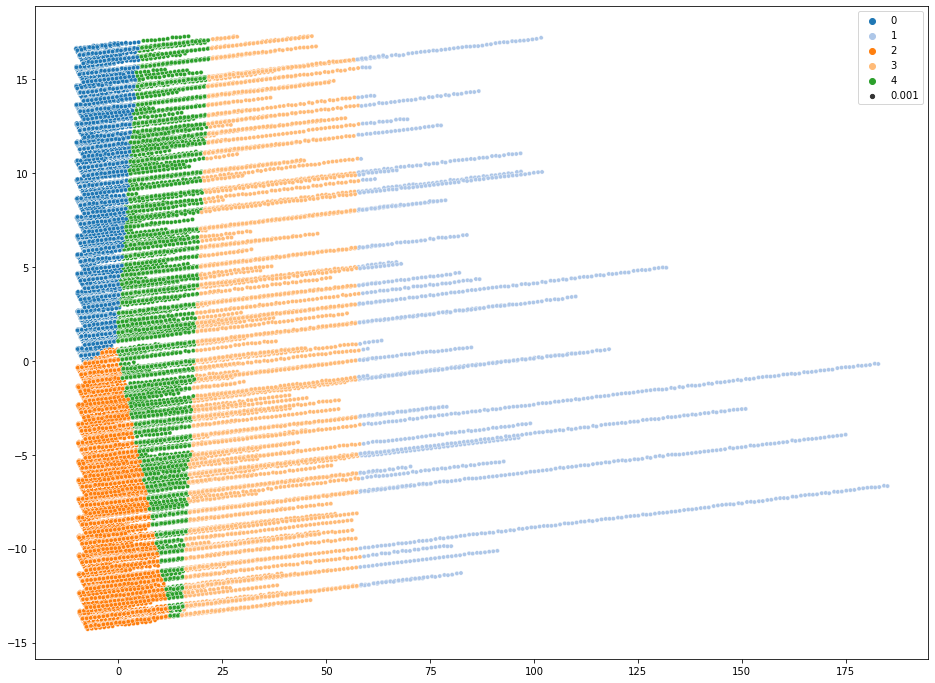

In [106]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler 
kmeans_minibatch = MiniBatchKMeans(n_clusters = 5, batch_size = 3072, random_state = 420)
labels = kmeans_minibatch.fit_predict(X)

pca = PCA()
data_pca = pca.fit_transform(X)
plt.figure(figsize = (16,12))
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue = labels, palette='tab20', size = 0.001)

pca3d = PCA(n_components = 3)
data_pca3d = pca3d.fit_transform(X)
data_pca3d = pd.DataFrame(data_pca3d).rename(columns={0: "x", 1: "y", 2: "z"})
data_pca3d = pd.concat([data_pca3d, pd.DataFrame(labels)], axis = 1).rename(columns={0: "labels"})
pd.DataFrame(data_pca3d).to_csv("minibatch.csv")

C:\Users\mipec\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\mipec\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\mipec\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


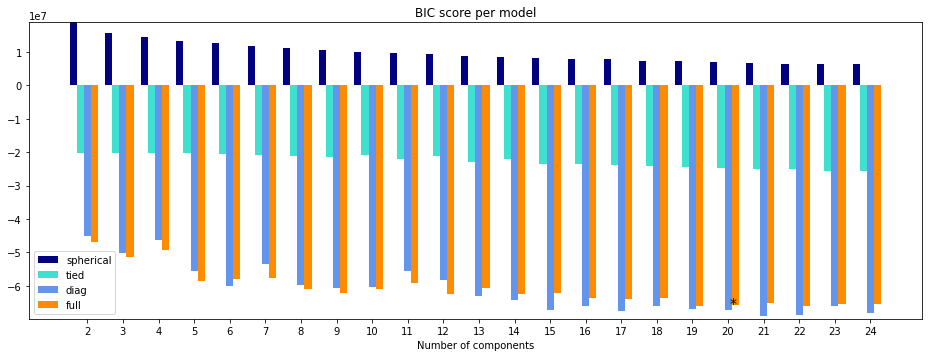

In [101]:
from sklearn.mixture import GaussianMixture
from scipy import linalg
import itertools
sample = X.sample(30000)
lowest_bic = np.infty
bic = []
n_components_range = range(2, 25)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(sample)
        bic.append(gmm.bic(sample))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
bars = []

# Plot the BIC scores
plt.figure(figsize=(16, 12))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
    
# oznaczenie najlepszego w
    
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

In [102]:
best_gmm.get_params

<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='diag', n_components=21)>

In [104]:
gm = GaussianMixture(covariance_type='diag', n_components = 21)
labels_gm = gm.fit_predict(X)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

C:\Users\mipec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

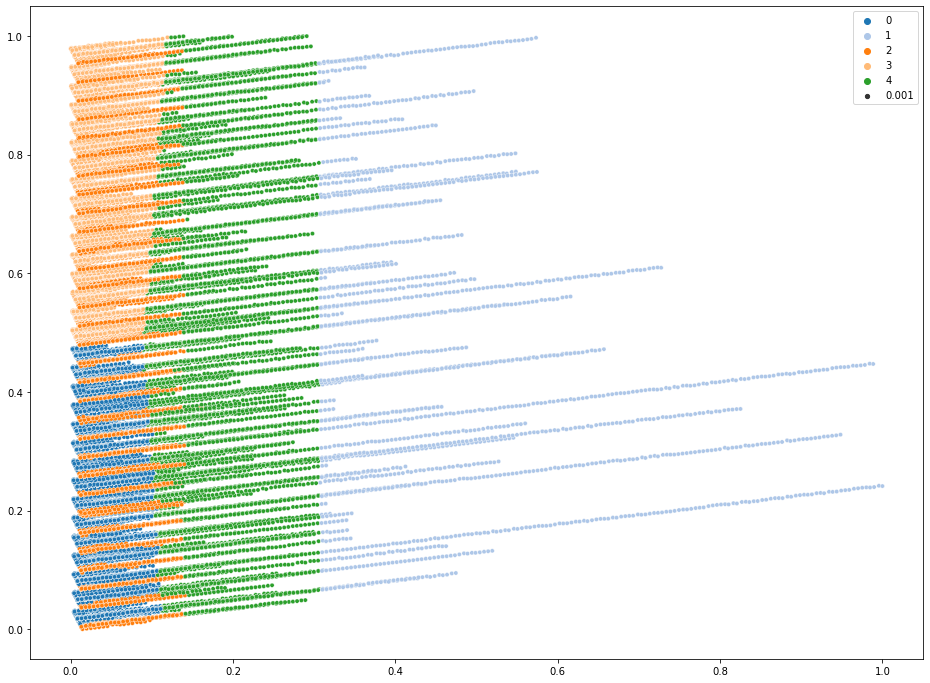

In [108]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

X = data_preprocessed
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(X)

pca = PCA()
data_pca = pca.fit_transform(X)
data_pca = MinMaxScaler().fit_transform(data_pca)
plt.figure(figsize = (16,12))
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue = labels, palette='tab20', size = 0.001)


In [127]:
pca3d = PCA(n_components = 3)
data_pca3d = pca3d.fit_transform(X)
data_pca3d = pd.DataFrame(data_pca3d)
data_pca3d = MinMaxScaler().fit_transform(data_pca3d)
data_pca3d = pd.DataFrame(data_pca3d, columns = ['x', 'y', 'z'])
data_pca3d = pd.concat([pd.DataFrame(data_pca3d), pd.DataFrame(labels)], axis = 1).rename(columns={0: "labels"})
pd.DataFrame(data_pca3d).to_csv("kmeans_3d.csv")

In [66]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
import shap
X = data_preprocessed

kmeans_minibatch = MiniBatchKMeans(n_clusters = 5, batch_size = 3072, random_state = 420)
labels_minibatch = kmeans_minibatch.fit(X).labels_
y = label_binarize(labels_minibatch, classes=[0,1,2,3,4])

clf = DecisionTreeClassifier(random_state=420)
clf.fit(X, y)

DecisionTreeClassifier(random_state=420)

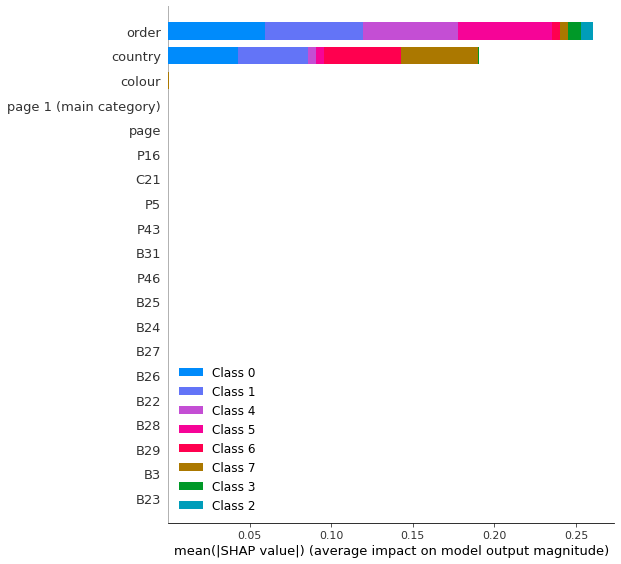

In [79]:
shap_values = shap.TreeExplainer(clf).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

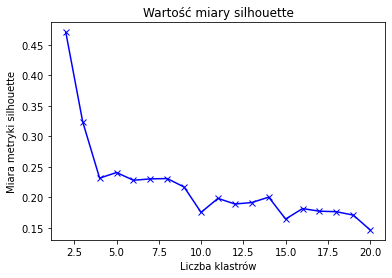

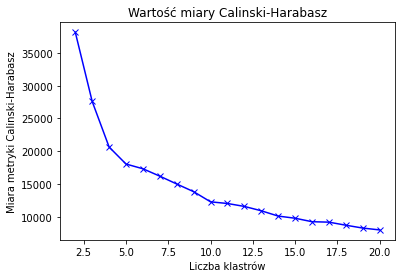

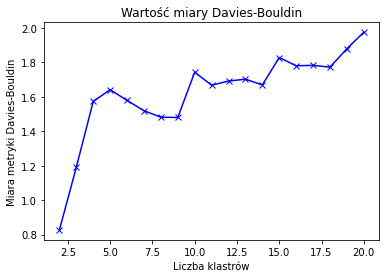

In [104]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler

data_preprocessed_days = data_preprocessed.drop(columns = 'day')
X = data_preprocessed_days
X['order'] = MinMaxScaler().fit_transform(pd.DataFrame(X['order']))
X['country'] = MinMaxScaler().fit_transform(pd.DataFrame(X['country']))
sample = X.sample(30000)

from sklearn.cluster import KMeans
plot_scores(MiniBatchKMeans(random_state=420, n_init = 20, batch_size = 3072), sample)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:>

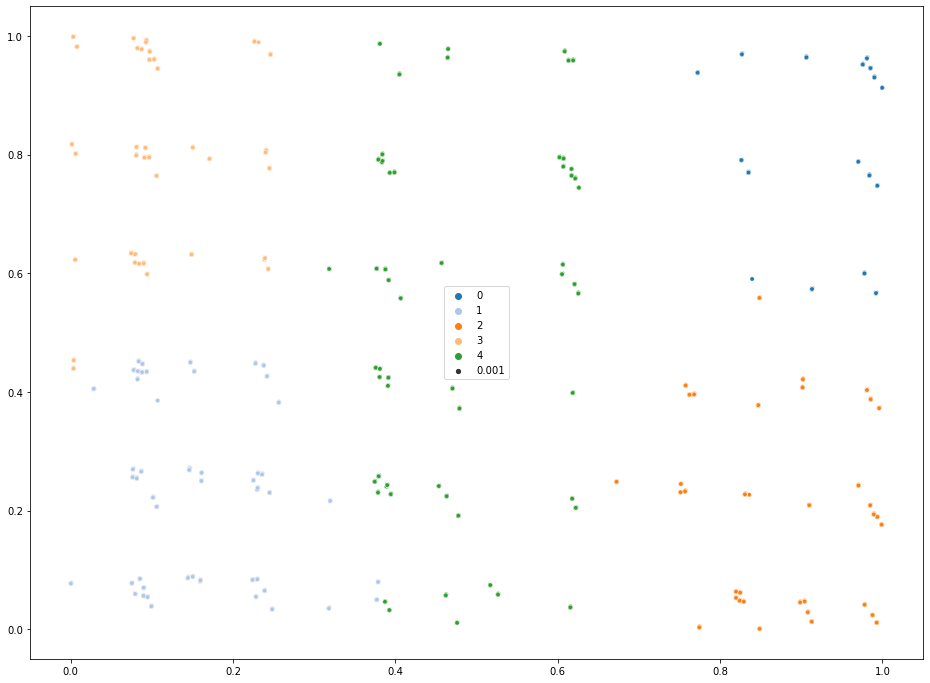

In [105]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

kmeans = KMeans(random_state = 420, n_clusters = 5)
kmlabels = kmeans.fit(X).labels_

pca = PCA()
data_pca = pca.fit_transform(X)
data_pca = MinMaxScaler().fit_transform(data_pca)
plt.figure(figsize = (16,12))
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue = kmlabels, palette='tab20', size = 0.001)


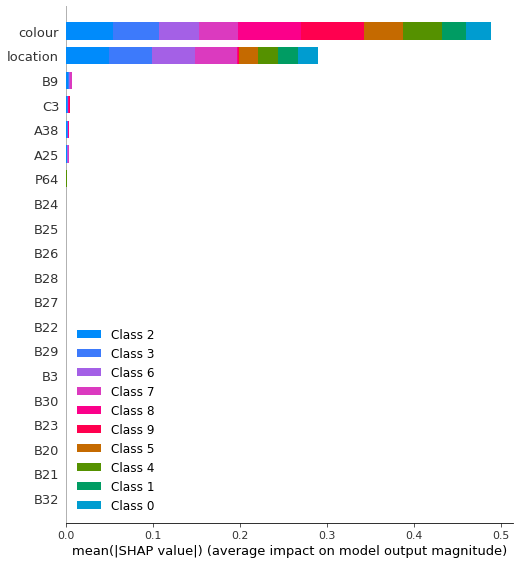

In [106]:
y = label_binarize(kmlabels, classes=[0,1,2,3,4])

clf = DecisionTreeClassifier(random_state=420)
clf.fit(X, y)

shap_values = shap.TreeExplainer(clf).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar", max_display = 50)

In [141]:
plt.figure(figsize = (16,12))
histdata = data.groupby("page 2 (clothing model)").count().sort_values(by = 'weekday', ascending = False)['weekday']
plt.show()
pd.DataFrame(histdata.loc[histdata>1500]).index

<Figure size 1152x864 with 0 Axes>

Index(['B4', 'A2', 'A11', 'P1', 'B10', 'A4', 'A15', 'A5', 'A10', 'A1', 'A12',
       'A3', 'A9', 'B13', 'B24', 'C5', 'A6', 'A7', 'A8', 'A13', 'B1', 'B11',
       'P6', 'A17', 'P16', 'C17'],
      dtype='object', name='page 2 (clothing model)')